<a href="https://colab.research.google.com/github/Harshithsp/DFS/blob/main/ai_tools_data_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
import pandas as pd

resumeDataSet = pd.read_csv('/content/JobResume_Dataset.csv', sep=',', nrows=1000)
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [27]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer']


In [28]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


DevOps Engineer              110
Python Developer              96
Java Developer                84
Operations Manager            80
Electrical Engineering        60
Automation Testing            52
Web Designing                 45
HR                            44
Hadoop                        42
Data Science                  40
SAP Developer                 40
Sales                         40
Mechanical Engineer           40
Arts                          36
Database                      33
Health and fitness            30
PMO                           30
Business Analyst              28
Network Security Engineer     25
Civil Engineer                24
Advocate                      20
ETL Developer                  1
Name: Category, dtype: int64


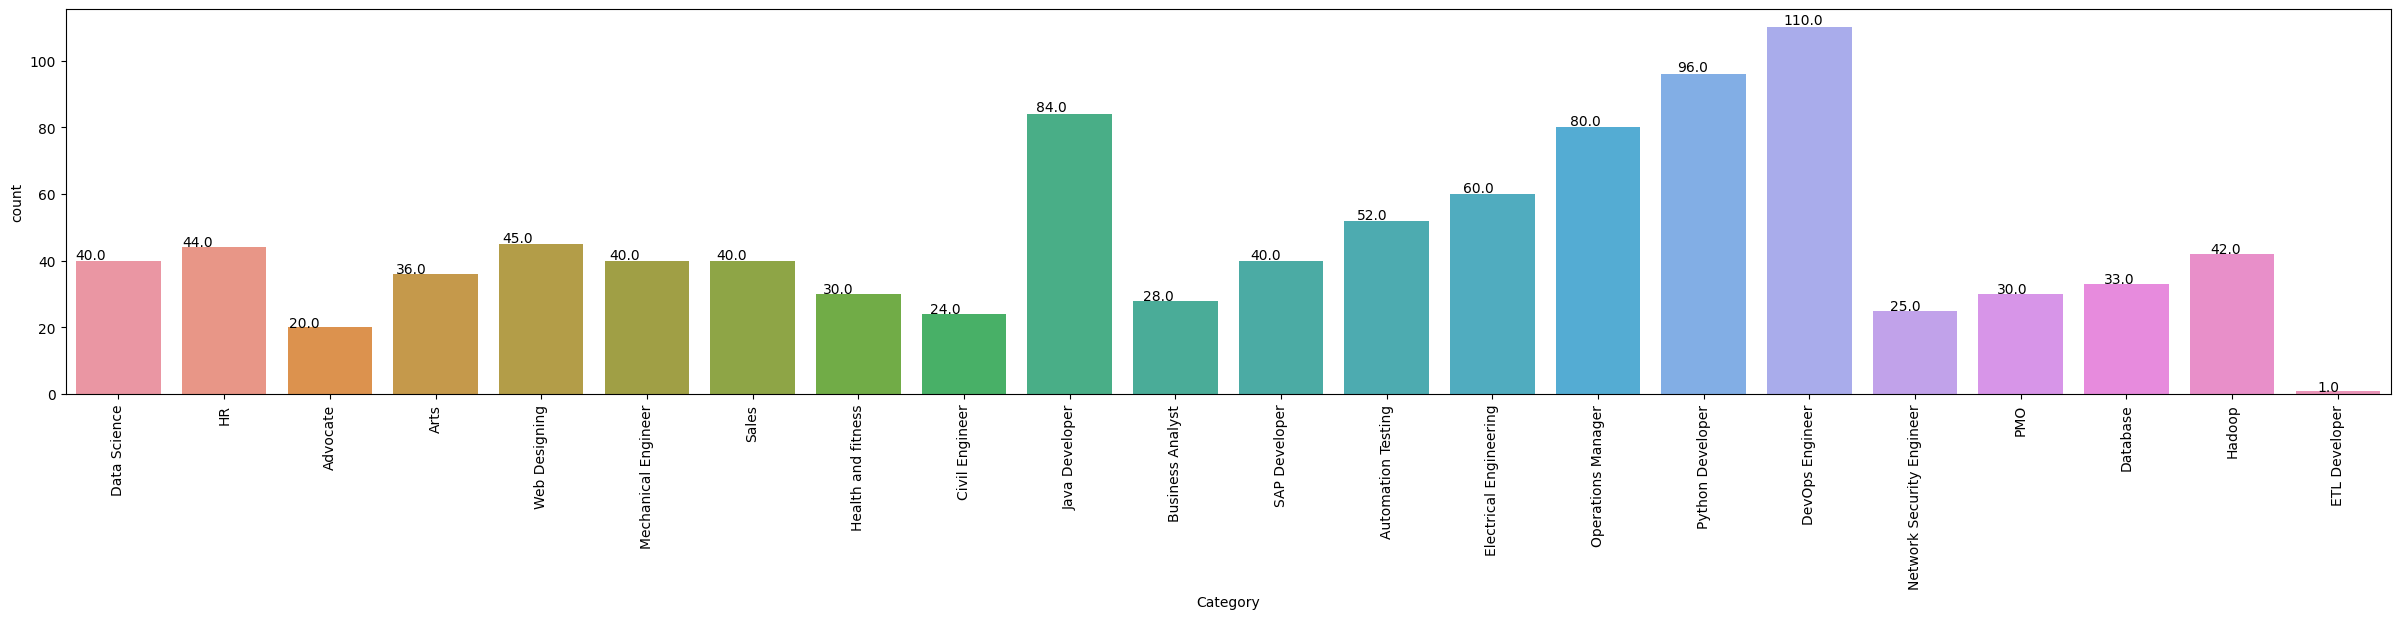

In [29]:
import seaborn as sns
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

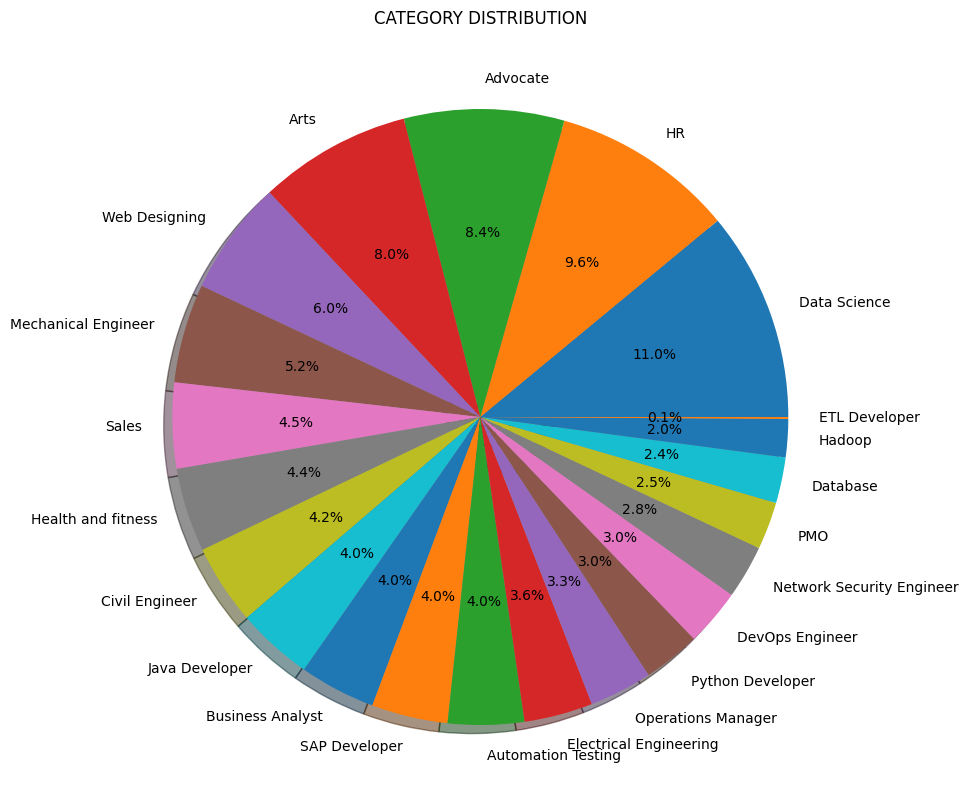

In [30]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [33]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [36]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [38]:
resumeDataSet_d=resumeDataSet.copy()

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Exprience', 4066), ('company', 3612), ('months', 3447), ('Details', 3035), ('description', 2898), ('1', 2391), ('project', 2108), ('team', 2095), ('Project', 2009), ('6', 1538), ('year', 1421), ('Maharashtra', 1399), ('data', 1377), ('Pune', 1312), ('Less', 1296), ('Management', 1233), ('Ltd', 1194), ('using', 1142), ('Skill', 1042), ('development', 1034), ('management', 1023), ('2', 983), ('Engineering', 960), ('Operations', 950), ('Python', 934), ('India', 906), ('Pvt', 905), ('C', 897), ('SQL', 885), ('requirements', 876), ('customer', 863), ('various', 855), ('Education', 847), ('January', 846), ('Java', 845), ('reports', 843), ('business', 827), ('client', 802), ('Team', 794), ('activities', 790), ('Software', 782), ('Services', 778), ('System', 772), ('monthsCompany', 766), ('4', 764), ('application', 762), ('issues', 745), ('University', 743), ('A', 742), ('process', 740)]


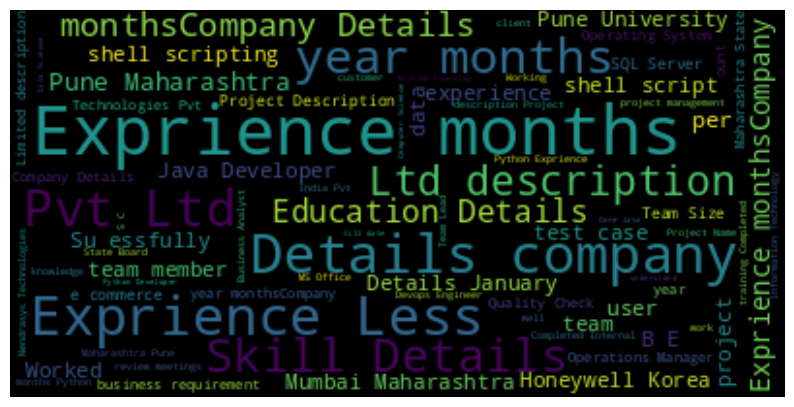

In [43]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
requiredTarget = np.unique(requiredTarget)

In [81]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [82]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,5,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,5,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,5,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,5,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,5,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [83]:
resumeDataSet.Category.value_counts()

7     110
18     96
13     84
16     80
9      60
2      52
21     45
10     44
11     42
5      40
19     40
20     40
14     40
1      36
6      33
12     30
17     30
3      28
15     25
4      24
0      20
8       1
Name: Category, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(800, 1500)
(200, 1500)


In [91]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         9
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        23
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.